# 결측치와 누락값 & 이상치

### 데이터 분석에서 결측치와 누락값은 정말 중요한 포인트입니다.
- 결측치 : 실제 Na 값이지만 정말 Na값일 수 있다. 서베이 설문조사 -> 어떤 문항은 내가 선택하지 않은 문항 na 어 na? 결측치
- 결측치가 정말 순수하게 결측치의미인가 아니면 na값 자체가 값일 수 있는 것
- 누락값 : 휴먼에러로 인한 누락값, 어떤 이유로 누락이 되었는지?
- 공통적으로 이야기하는 것은? 값이 없다. NA, NaN 데이터에 보일 것

- 결측치&누락값 왜 처리하려고 하는가?
- 분석에 방해가 된다. na값이 정말 그 값이면 방해보다는 인사이트가 될 수 있다.
- na 결측치, 누락값이라 생각한다면 -> 방해가 된다는 것은 머신에게 학습 시키기 위해서
- na값을 -> 머신에게 학습시키기 위해 처리한다.

- na값이 왜 중요한가?
- 시험성적데이터 [100,50,60,30,50,30] 이 데이터를 알고 평균을 알 수 있지만
- 시험성적데이터 [100,50,x,x,50,30] 이 누락이 되었다.

- x값이 누락값이 실제의 값과 가장 유사하게 대입되면 가장 실제값과 예측값이 같아지는 것


- 결측치가 정말 중요하고 단순하게 접근해야 할 그런 범위는 아니구나
- 결측치를 실제값과 유사하지 않게 적는다면 -> 결국에는 차이가 발생할 것이고 모델의 성능에도 영향을 미치겠다.

- 그럼 이런 결측치를 처리하는 방법은 어떻게 하나?
------
- 1. 가장 간단한 건 날린다. 버린다. 결측치 날린다.
    - 결측치를 날리는 기준은? 결측치가 전체 비중에 1%미만 정도면 쉽게 날린다. 하지만 절대값에 따라 달라질 수 있다.

- 2. 결측치가 상당한 비중을 차지하는 경우? 전체 데이터 셋 컬럼에서 30% 40% 결측치가 있다.
    - 결측치를 우린 어떤 기준으로 처리해야 하는가?
    - 다 날린다? -> 머신에게 학습할 데이터양 줄어드는 것
    - 성능에 영향을 미칠 수 있다.
    - 결측치를 최대한 채워서 메꾸는 형식을 생각한다.
    
- 3. 너무 데이터가 다 결측치면 그건 날려도 상관 없다. 80~90% 다 결측치 컬럼이면 비즈니스적인 이해관계를 보고 도메인지식 이용해서 날려야 한다.
    - 결측치를 채울 수 없다면
    
---

- 결측치가 이렇게 많은 컬럼에서 단순하게 접근해서 결측치를 대체한다면 평균으로만 대체한다면 -> 기온데이터라고 한다면 날씨는 계절에 대한 영향을 받는데
- 단순하게 평균으로만 하면 -> 문제가 크다.

- 결측치는 단순하게 생각할 것이 절대 아니다. 정말 다양하게 고민하고 도메인, 통계적으로 다방면 고민해야 한다.


- 결측치를 나타내는 용어
- 완전 무작위 결측치 MCAR ( Missing Completely at Random) 완전 무작위 -> 어떤 인간의 편향이나 기계 결함이 아니라 완전 무작위 랜덤한 것
- 무작위 결측 MAR( Missing at Random ) 어떤 상황으로 인해서 발생하는 경우, 기업에서 제조과정에서 A제조공정 B제조공정 중 A가 갑자기 문제가 발생해서 결측치가 발생 A공정에만 문제가 발생한 결측치
- 비무작위 결측 NMAR( Missing at Not random) 결측값인데 정말 na가 하나의 특성이 될 수 있다 서베이 -> 소득에 대한 서베이 하면 자신의 소득을 사실 꺼리기가 좀 그렇다 na 로 처리 -> 값이

### 결측치 처리 방법
- 결측치 날리고 제외하고 진행
- 평균, 중위값, 등등 어떤 특정 통계 값으로 대체
- 보간법 (interpolation)
- 대부분 보간법에 좀 많은 시간을 보낼 것
- 선형보간 Spline 보간법, time 시계열 보간법 등등

In [1]:
#완전 무작위 결측치, 무작위 결측, 비무작위 결측

In [2]:
pip install missingno #결측치를 시각적으로 확인할 수 있는 라이브러리

In [3]:
## 데이터 불러와서 결측치 보기

import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('bike_sharing_daily.csv')
dfe = pd.read_csv('country_timeseries.csv')

In [9]:

df.isna().sum() #na값 몇 개인가?
print(type(df.isna())) # df에서 na값이 들어 있는 것들을 데이터 프레임으로 반환해줌
print(df.isna())
print(df.isna().sum()) #컬럼 별로 결측치가 몇개인지 알려줌

<class 'pandas.core.frame.DataFrame'>
     instant  dteday  season     yr   mnth  holiday  weekday  workingday  \
0      False   False   False  False  False    False    False       False   
1      False   False   False  False  False    False    False       False   
2      False   False   False  False  False    False    False       False   
3      False   False   False  False  False    False    False       False   
4      False   False   False  False  False    False    False       False   
..       ...     ...     ...    ...    ...      ...      ...         ...   
726    False   False   False  False  False    False    False       False   
727    False   False   False  False  False    False    False       False   
728    False   False   False  False  False    False    False       False   
729    False   False   False  False  False    False    False       False   
730    False   False   False  False  False    False    False       False   

     weathersit   temp  atemp    hum  windspeed  

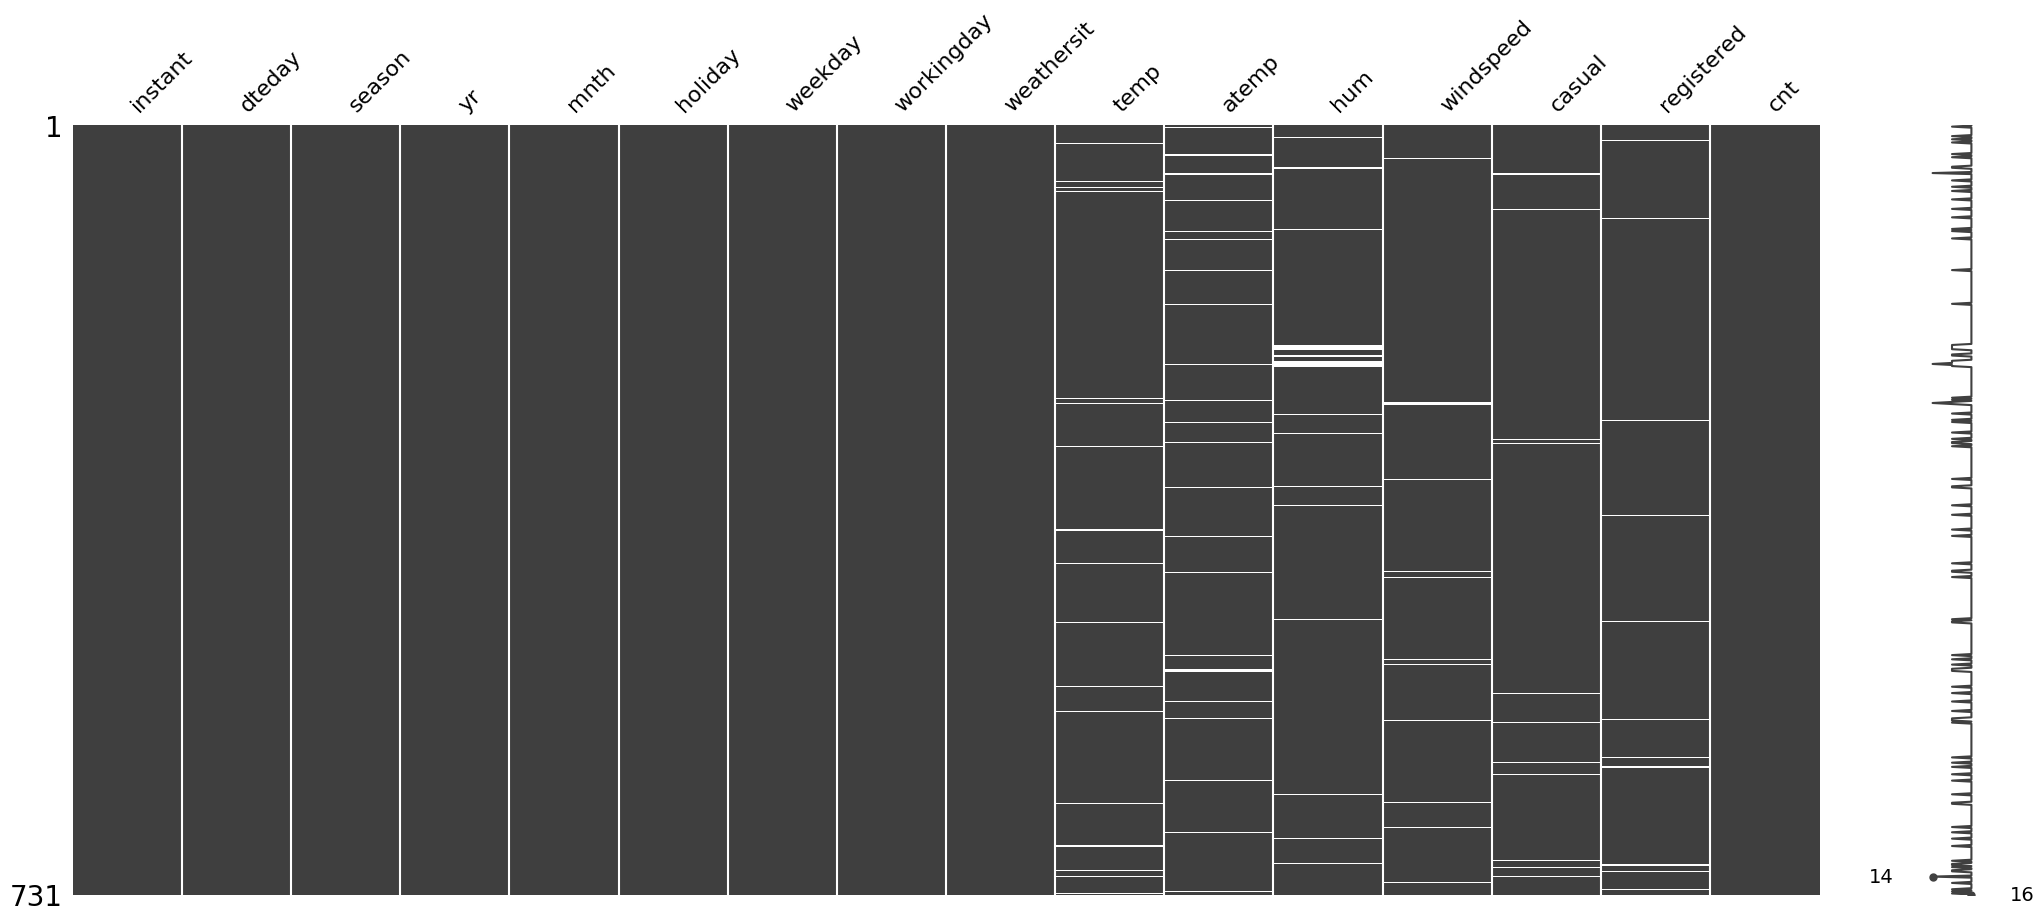

In [10]:
#결측치 시각화
msno.matrix(df)
plt.show()
#결측치가 어느 행 어떤 컬럼에 있는지 알려줌

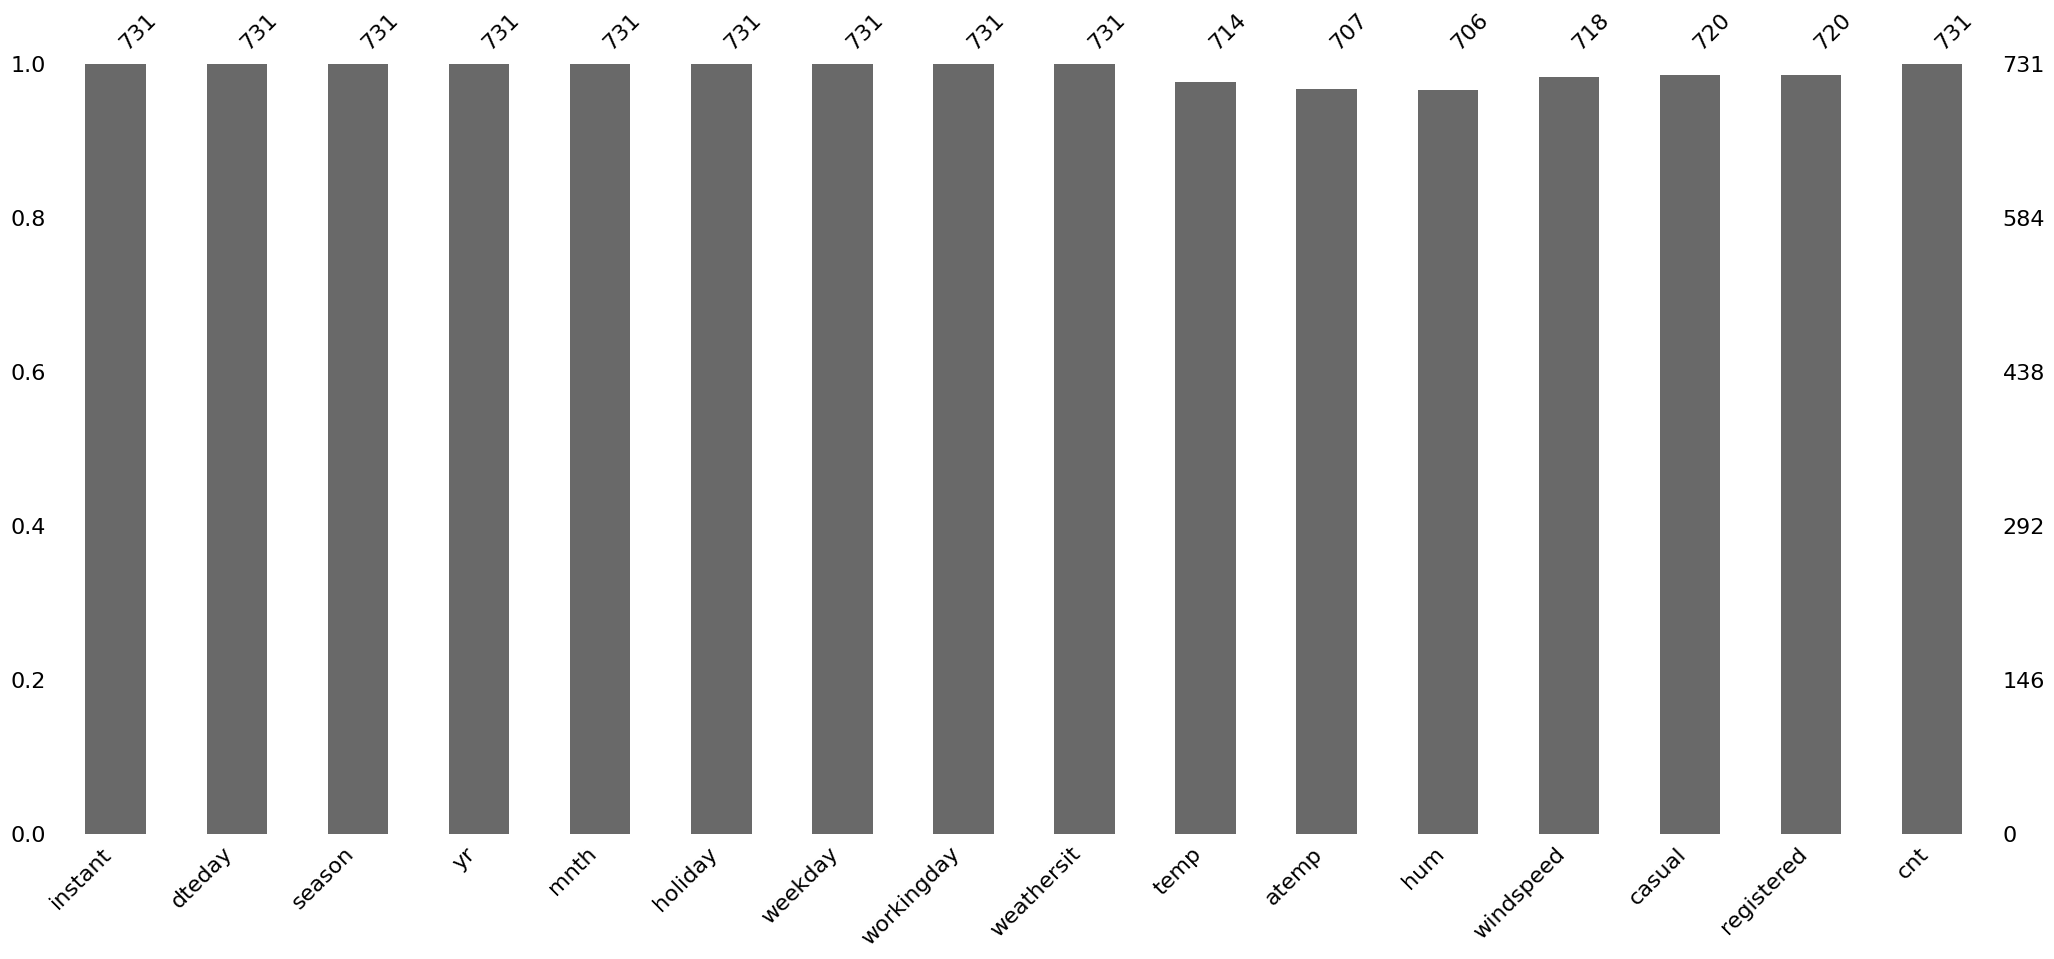

In [ ]:
#막대그래프

msno.bar(df)
plt.show()

In [ ]:
dfe

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


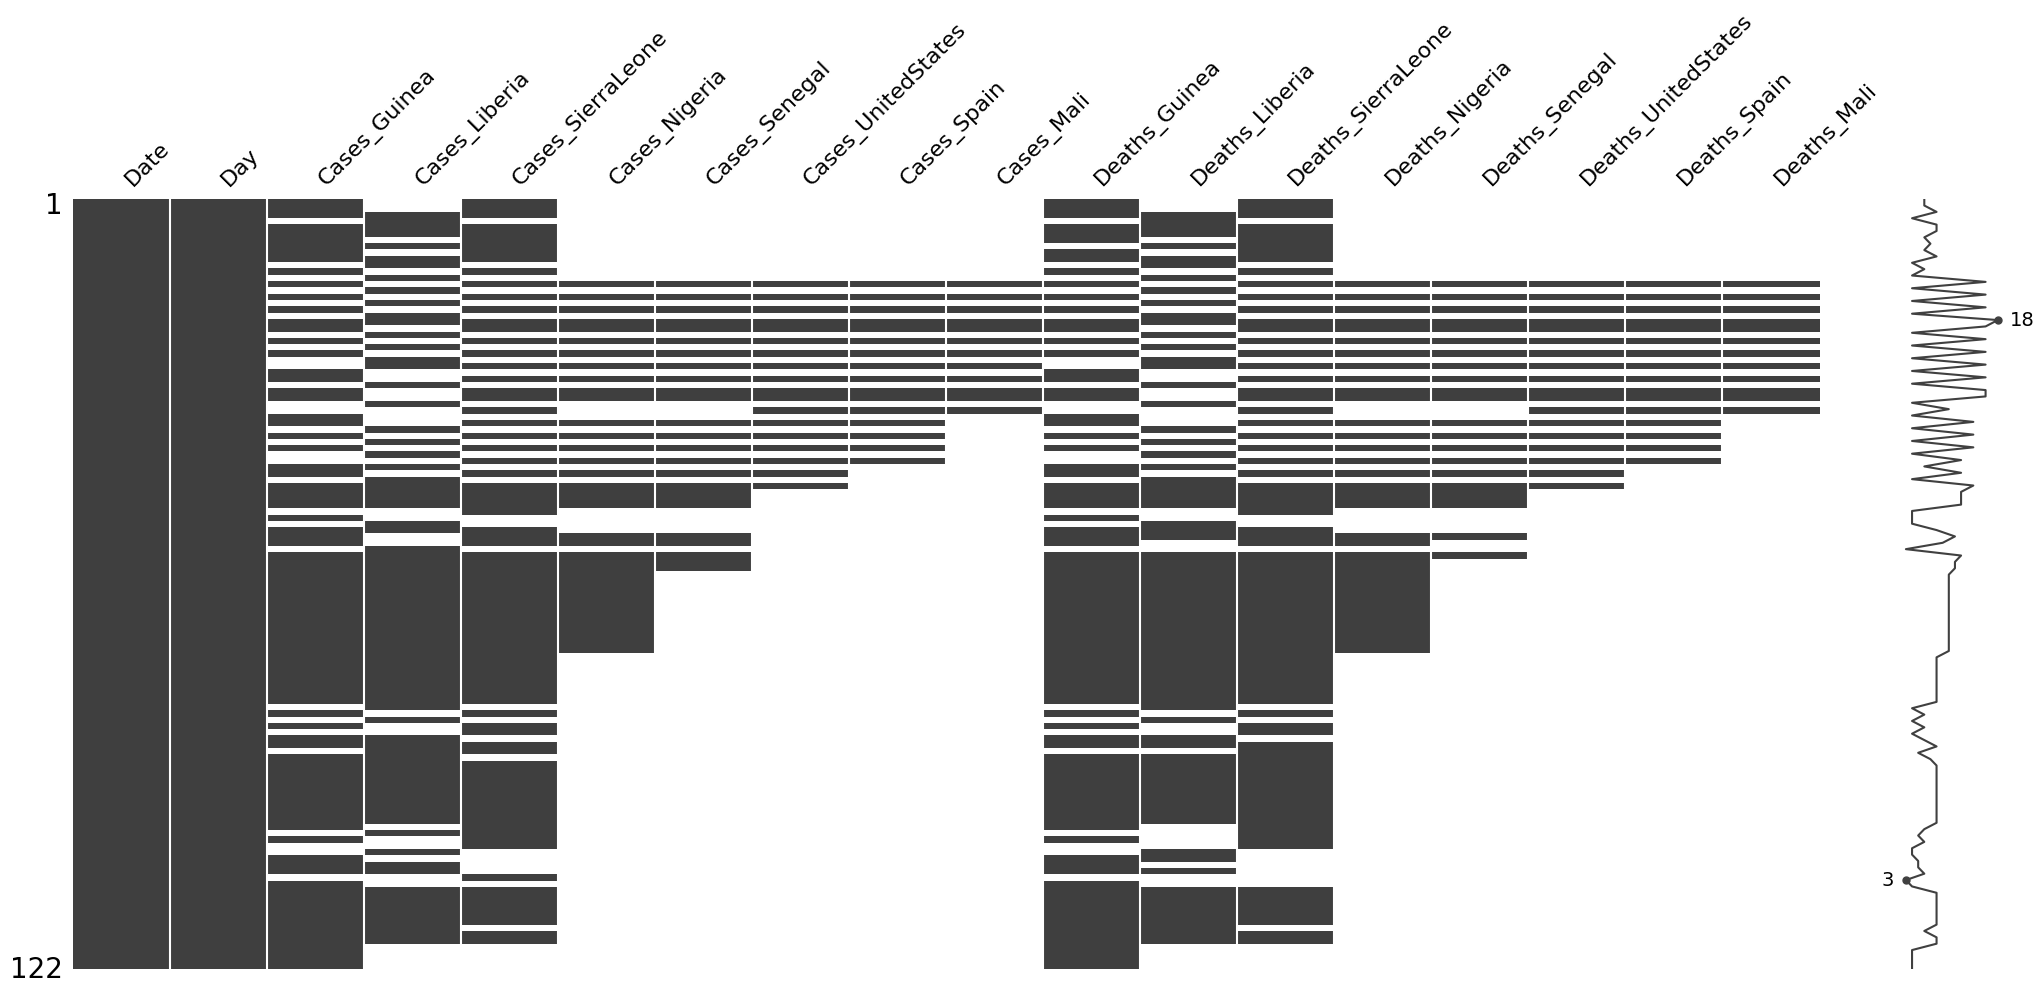

In [ ]:
#결측치 시각화
msno.matrix(dfe)
plt.show()

## 결측치를 대체하는 방법
- 샘플 데이터만 뽑아서 어떤 식으로 작동하는지 확인해 보자!

In [11]:
dfe

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#결측치가 어떤 식으로 바뀌는지 확인하자!
ebola=dfe.iloc[0:15,0:5] #iloc[행번호:행번호,열번호:열번호]

In [14]:
print(ebola) #drop하면 0,1,3,6,8,10,11,12,13,14 -> 10개가 사라진다고 볼 수 있다.

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0     1/5/2015  289        2776.0            NaN            10030.0
1     1/4/2015  288        2775.0            NaN             9780.0
2     1/3/2015  287        2769.0         8166.0             9722.0
3     1/2/2015  286           NaN         8157.0                NaN
4   12/31/2014  284        2730.0         8115.0             9633.0
5   12/28/2014  281        2706.0         8018.0             9446.0
6   12/27/2014  280        2695.0            NaN             9409.0
7   12/24/2014  277        2630.0         7977.0             9203.0
8   12/21/2014  273        2597.0            NaN             9004.0
9   12/20/2014  272        2571.0         7862.0             8939.0
10  12/18/2014  271           NaN         7830.0                NaN
11  12/14/2014  267        2416.0            NaN             8356.0
12   12/9/2014  262           NaN         7797.0                NaN
13   12/7/2014  260        2292.0            NaN

- 결측치를 날리면?

In [15]:
ebola.dropna() # 데이터가 깔끔하게 정리는 된다.

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
2,1/3/2015,287,2769.0,8166.0,9722.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
7,12/24/2014,277,2630.0,7977.0,9203.0
9,12/20/2014,272,2571.0,7862.0,8939.0


- fillna(method = '') 문법

In [17]:
meant = ebola['Cases_SierraLeone'].mean()

In [21]:
ebola['Cases_SierraLeone'].fillna(meant)
print(type(ebola['Cases_SierraLeone'].fillna(meant))) #특정 행의 na값을 채운 다음, 그 결과를 series로 반환함
#df로 나타내고 싶다? -> to_frame() 사용하기

<class 'pandas.core.series.Series'>


In [22]:
# 원본데이터 저장은 안 된다.
ebola['Cases_SierraLeone']

0     10030.0
1      9780.0
2      9722.0
3         NaN
4      9633.0
5      9446.0
6      9409.0
7      9203.0
8      9004.0
9      8939.0
10        NaN
11     8356.0
12        NaN
13     7897.0
14        NaN
Name: Cases_SierraLeone, dtype: float64

- ffill - 누락값이 나타나기 전의 값으로 누락값을 변경
- bfill - 누락값이 나타나나 이후의 첫 번재 값으로 앞쪽의 누락값을 변경

In [23]:
ebola['Cases_SierraLeone'].fillna(method='ffill').to_frame() #na값을 fillna를 통해 채우되, 어떤 방식을 적용할 지 생각해볼 수 있음.

,Cases_SierraLeone
0,10030.0
1,9780.0
2,9722.0
3,9722.0
4,9633.0
5,9446.0
6,9409.0
7,9203.0
8,9004.0
9,8939.0


In [24]:
ebola.Cases_SierraLeone.to_frame() #.으로 연결해서도 호출할 수 있음

,Cases_SierraLeone
0,10030.0
1,9780.0
2,9722.0
3,NaN
4,9633.0
5,9446.0
6,9409.0
7,9203.0
8,9004.0
9,8939.0


In [25]:
ebola['Cases_SierraLeone'].fillna(method='bfill').to_frame() #이번엔 누락값 이후의 값으로 채워짐

,Cases_SierraLeone
0,10030.0
1,9780.0
2,9722.0
3,9633.0
4,9633.0
5,9446.0
6,9409.0
7,9203.0
8,9004.0
9,8939.0


- 문법
- 보간법 (interpolate)
- interpolate(method='')
- 누락값 사이의 값을 평균으로 대체해서 만든다. 중간에 결측치가 있으면 보간법을 이용해서 결측치를 대체한다.

In [ ]:
ebola
#다항 보간법
#스플라인 보간법 -> 각 데이터 사이를 다항함수를 통해 연결하여 보간하는 방

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,NaN,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,NaN,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [26]:
ebola['Cases_SierraLeone'].interpolate().to_frame()

,Cases_SierraLeone
0,10030.0
1,9780.0
2,9722.0
3,9677.5
4,9633.0
5,9446.0
6,9409.0
7,9203.0
8,9004.0
9,8939.0


In [27]:
ebola['Cases_SierraLeone'].fillna(method='bfill').to_frame() #fillna와 interpolate 두 경우에서 na가 다르게 채워진다는 점을 알아챘다면 충분

,Cases_SierraLeone
0,10030.0
1,9780.0
2,9722.0
3,9633.0
4,9633.0
5,9446.0
6,9409.0
7,9203.0
8,9004.0
9,8939.0


### 보간법에 대해서

method must be one of

['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']

In [ ]:
ebola['Cases_Liberia'].interpolate(method='dfas').to_frame() #오류 메세지를 확인해서 어떤 보간 방법이 사용될 수 있는지 알아볼 수 있다.

ValueError: method must be one of ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']. Got 'dfas' instead.

<Axes: >

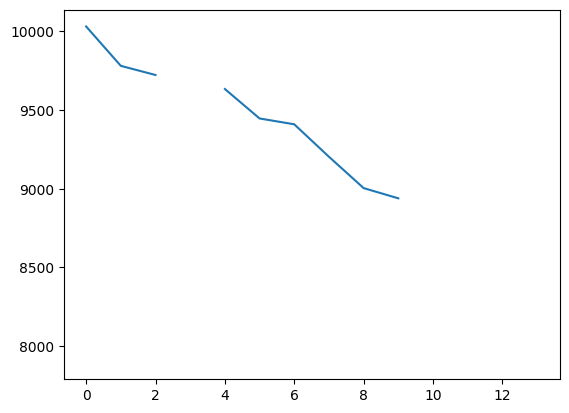

In [28]:
# 결측값이 있는 경우는 뚝 떨어진 값이 된다.
ebola['Cases_SierraLeone'].plot()

<Axes: >

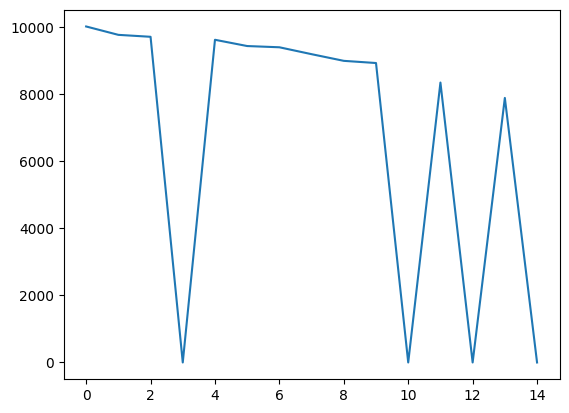

In [29]:
# 단순 0으로 채우면 데이터의 변화 경향성을 올바르게 반영할 수 없음
ebola['Cases_SierraLeone'].fillna(0).plot()

<Axes: >

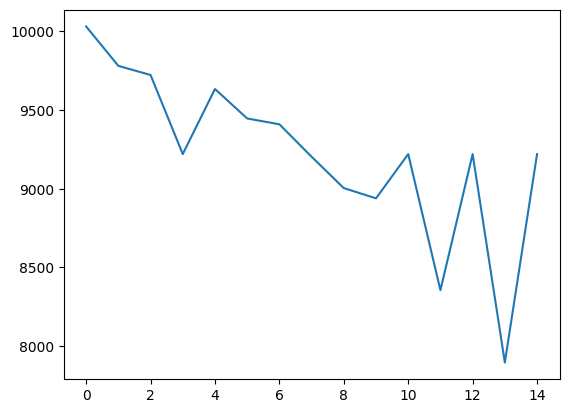

In [30]:
# 평균도 비슷
ebola['Cases_SierraLeone'].fillna(meant).plot()

<Axes: >

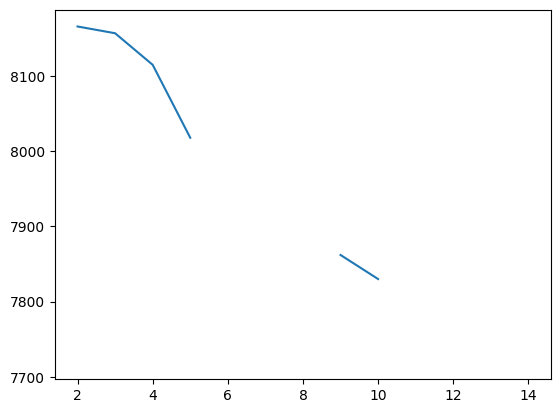

In [31]:
# 결측값이 있는 경우는 뚝 떨어진 값이 된다.
ebola['Cases_Liberia'].plot()

In [35]:
ebola['Cases_SierraLeone'].interpolate(method='linear')
print(ebola) # interpolate는 원본 데이터를 바꾸지 않음. 사본을 만들어서 저장해야겠죠.

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0     1/5/2015  289        2776.0            NaN            10030.0
1     1/4/2015  288        2775.0            NaN             9780.0
2     1/3/2015  287        2769.0         8166.0             9722.0
3     1/2/2015  286           NaN         8157.0                NaN
4   12/31/2014  284        2730.0         8115.0             9633.0
5   12/28/2014  281        2706.0         8018.0             9446.0
6   12/27/2014  280        2695.0            NaN             9409.0
7   12/24/2014  277        2630.0         7977.0             9203.0
8   12/21/2014  273        2597.0            NaN             9004.0
9   12/20/2014  272        2571.0         7862.0             8939.0
10  12/18/2014  271           NaN         7830.0                NaN
11  12/14/2014  267        2416.0            NaN             8356.0
12   12/9/2014  262           NaN         7797.0                NaN
13   12/7/2014  260        2292.0            NaN

In [43]:
array = ebola['Cases_SierraLeone'].isna()
print(array)
ebola['Cases_SierraLeone'][array]

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12     True
13    False
14     True
Name: Cases_SierraLeone, dtype: bool


3    NaN
10   NaN
12   NaN
14   NaN
Name: Cases_SierraLeone, dtype: float64

- 선형 보간법
- 두 점사의 거리 구하는 공식
- 1차원 두 점사이의 거리로 해당 누락값을 대체한다.

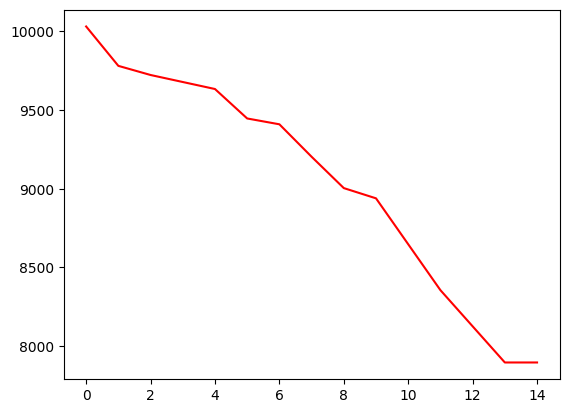

In [55]:
k= ebola['Cases_SierraLeone'].interpolate(method='linear')


plt.plot(k,'r')

plt.show()

#이렇듯 보간이 완료된 그래프를 확인할 수 있다. 추후에 어떤 부분에서 보간이 이루어졌는지를 시각화하는 방법에 대해서도 연구해볼 예정이다.

<Axes: >

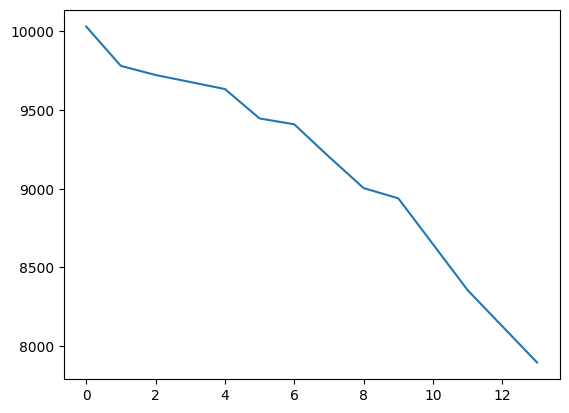

In [34]:
#1차 2차, 3차 항을 높이면서 보간
ebola['Cases_SierraLeone'].interpolate(method='slinear').plot()

<Axes: >

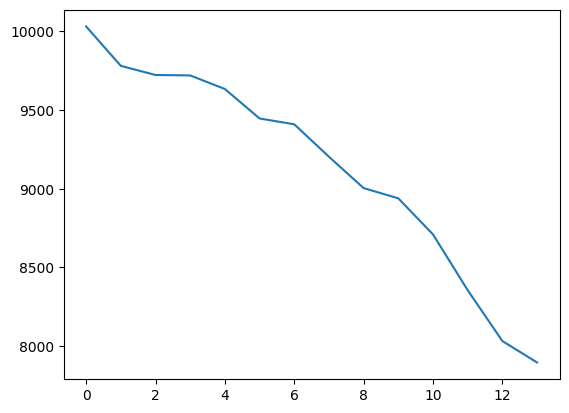

In [56]:
#1차 2차, 3차 항을 높이면서 보간
ebola['Cases_SierraLeone'].interpolate(method='cubic').plot()

<Axes: >

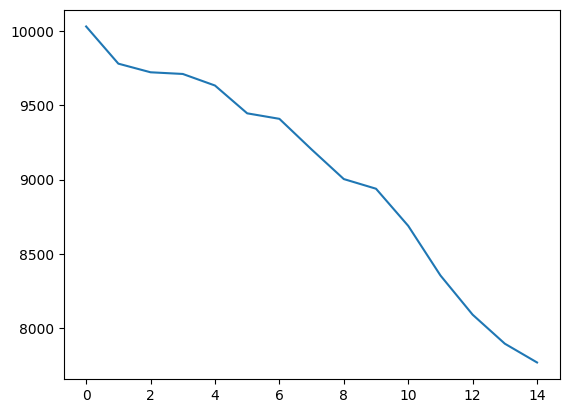

In [57]:
#spline
#기존에는 1차원 차원으로 생각해서 보간을 했다면
#spline 통해서 order 차수 높이면
# 2차원 이상으로

ebola['Cases_SierraLeone'].interpolate(method='spline',order=2).plot() #이러면 데이터 사이를 2차 다항식으로 연결하겠지

In [58]:
dfe['Date']=pd.to_datetime(dfe['Date']) #date값을 실제 시간 관련 정보로 변환해서 넣어줌

df_e=dfe.set_index('Date') #날짜 기준으로 인덱스를 다시 설정하여 정렬

In [59]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [60]:
df_e.iloc[0:15,0:5]['Cases_SierraLeone'].interpolate(method='time').to_frame() #시간에 따른 결측치 대체
# 시계열로 대체를 할 때는 양쪽의 값을 가지고 Na값을 대체하기 때문에
#즉, 시간에 따른 보간을 진행하기 위해선, 데이터 자체에 시간 관련 정보가 들어있어야 한다.

,Cases_SierraLeone
Date,
2015-01-05,10030.000000
2015-01-04,9780.000000
2015-01-03,9722.000000
2015-01-02,9692.333333
2014-12-31,9633.000000
2014-12-28,9446.000000
2014-12-27,9409.000000
2014-12-24,9203.000000
2014-12-21,9004.000000


In [61]:
ebola['Cases_SierraLeone']

0     10030.0
1      9780.0
2      9722.0
3         NaN
4      9633.0
5      9446.0
6      9409.0
7      9203.0
8      9004.0
9      8939.0
10        NaN
11     8356.0
12        NaN
13     7897.0
14        NaN
Name: Cases_SierraLeone, dtype: float64

### 필수과제1
- bike 데이터를 가지고 위의 보간법을 진행해 주세요.
- 실제 bike 데이터를 가지고 보간법 후에 시각화를 통해서 어떤 식으로 변화하는지를 체크해 주세요!
- 수업시간 배운 것외에 2~3가지 정도만 추가로 진행해 보시면 좋을 것 같습니다. 보간법 사용 방법